In [1]:
import os
import requests
from bs4 import BeautifulSoup
import textwrap
import pandas as pd
import lxml  
import time
from IPython.display import clear_output
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from time import sleep
import re
from tqdm import tqdm
from functools import reduce

In [2]:
train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)

In [3]:
train

,brand_name_0,brand_name_1,brand_name_2,brand_name_3,brand_name_4,brand_name_5,brand_name_6,brand_name_7,brand_name_8,adaptive_sync_technology_0,...,NTSC,sRGB,battery_capacity_is_missing,usb_power_delivery_is_missing,estimated_battery_life_is_missing,ram_frequency_is_missing,memory_slots_num_is_missing,NTSC_is_missing,sRGB_is_missing,price
376,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,45.0,100.0,False,False,True,False,False,True,False,79999.0
377,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,45.0,100.0,False,True,True,False,False,False,True,79999.0
573,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,100.0,False,False,False,False,False,True,False,112999.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,45.0,100.0,False,False,False,False,False,True,False,95999.0
508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,45.0,100.0,True,False,False,False,False,True,False,95999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,62.0,True,False,True,False,False,False,False,76999.0
602,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,99.0,False,True,True,False,False,True,False,129999.0
603,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,99.0,False,True,True,False,False,True,False,129999.0
604,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,85.0,False,False,False,False,False,True,False,129999.0


In [4]:
test

,brand_name_0,brand_name_1,brand_name_2,brand_name_3,brand_name_4,brand_name_5,brand_name_6,brand_name_7,brand_name_8,adaptive_sync_technology_0,...,NTSC,sRGB,battery_capacity_is_missing,usb_power_delivery_is_missing,estimated_battery_life_is_missing,ram_frequency_is_missing,memory_slots_num_is_missing,NTSC_is_missing,sRGB_is_missing,price
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,72.0,0.0,False,False,False,False,False,False,True,174799.0
708,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,True,False,False,False,True,True,231999.0
698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,True,False,False,False,False,True,True,211599.0
640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,False,False,True,False,False,True,True,149999.0
678,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,94.0,False,True,False,False,False,True,False,183999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,62.0,True,False,True,False,False,False,False,78999.0
89,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,0.0,False,False,False,False,False,False,True,41999.0
522,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,False,False,False,False,False,True,False,99999.0
309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,46.0,65.0,False,False,False,False,False,False,False,70999.0


In [5]:
def print_whole_df(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        print(df)

In [6]:
X_train, y_train = train.drop(['price'], axis = 1), train.price
X_test, y_test = test.drop(['price'], axis = 1), test.price

In [7]:
from sklearn import linear_model

model = linear_model.Ridge(alpha=0.3, fit_intercept=True, normalize=True, 
                         copy_X=True, max_iter=None, tol=0.001, solver='auto', 
                         random_state=None).fit(X_train, y_train)

model.score(X_test, y_test)

0.8720636508397308

In [8]:
model.score(X_train, y_train)

0.9572346168771056

In [17]:
res = pd.concat([pd.Series(model.predict(X_train), index = y_train.index, name = 'Predict'), \
                 pd.Series(y_train, name = "Price")], axis = 1).sort_index()
print_whole_df(res.head(20))

         Predict    Price
0   24494.394255  24999.0
1   24657.227026  24999.0
2   27333.605827  24999.0
3   23272.089356  28999.0
4   25919.972382  28999.0
5   23973.335605  29999.0
6   36249.802498  29999.0
7   29752.933056  29999.0
8   34441.956936  31999.0
9   42234.449015  32999.0
10  35510.434290  32999.0
11  32184.605625  32999.0
12  31065.139737  32999.0
13  30082.774126  32999.0
14  34678.208034  32999.0
15  46325.632073  33999.0
16  38569.890250  33999.0
17  34951.725056  33999.0
18  34951.725056  33999.0
19  32160.686535  33999.0


In [59]:
stds = residuals.rolling(window = 40, min_periods = 20, center = True).std()

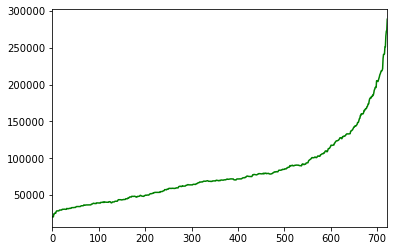

In [78]:
res[res.Predict > (res.Price + 2 * stds)]

,Predict,Price
9,42234.449015,32999.0
15,46325.632073,33999.0
51,47356.805327,37999.0
88,54448.609459,41999.0
145,71898.500517,49999.0
146,63366.661566,49999.0
168,64856.526360,51999.0
174,63590.768650,52999.0
183,67254.619870,53999.0
198,75466.024489,55799.0


In [92]:
train.loc[9].max_cpu_frequency

3.2

In [111]:
raw_data.loc[411][['model_name'] + raw_data.columns.tolist()]

model_name              Legion Y540-17IRH
average_rating                        4.8
price                               82799
reviews_num                            32
max_cpu_frequency                     4.1
                              ...        
hdd_increased_speed                 False
best_wi_fi_standard                     5
li_ion_battery_type                  True
ultrabook                           False
touch_numeric_keypad                False
Name: 411, Length: 109, dtype: object

In [ ]:
raw_data = pd.read_csv('data.csv').drop(0).set_index(np.arange(728))
raw_data

In [106]:
res[res.Predict < (res.Price - 2 * stds)]

,Predict,Price
76,33500.135872,39999.0
109,35133.941231,43999.0
296,57726.050010,69999.0
451,68774.212967,87999.0
475,67989.627519,90999.0
538,79537.457794,101999.0
561,89914.371099,109999.0
611,105340.341382,133999.0
619,115421.399537,136999.0
651,115612.987618,158999.0


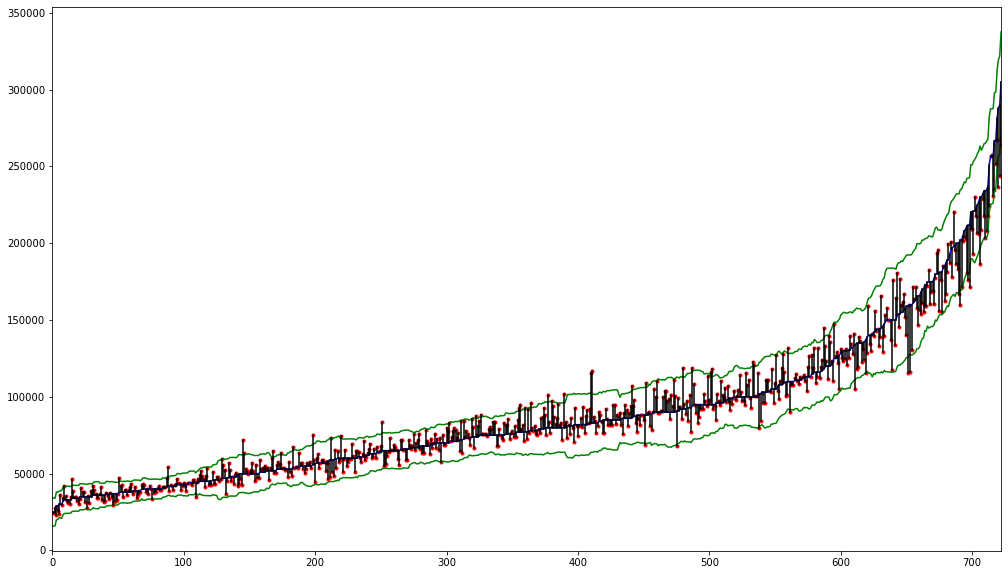

In [64]:
plt.figure(figsize = (17, 10))
res.Predict.plot(style = 'r.')
res.Price.plot(style = 'b')
(res.Price + 2 * stds).plot(style = 'g')
(res.Price - 2 * stds).plot(style = 'g')

for i in range(len(res.index)):
    plt.plot(np.repeat(res.index[i], 2), res.values[i], 'k')

In [38]:
res.apply(lambda vals: vals['Predict'] - vals['Price'], axis = 1).sort_values(ascending = False)

411    34360.289558
410    33009.123243
643    27368.381811
480    26738.839291
587    26721.778811
           ...     
706   -43180.731217
651   -43386.012382
653   -43961.340214
721   -46323.784964
720   -51460.351907
Length: 723, dtype: float64

In [47]:
residuals = res.apply(lambda vals: vals['Predict'] - vals['Price'], axis = 1)

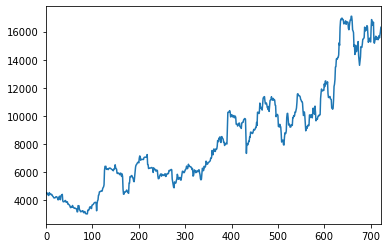

In [57]:
residuals.rolling(window = 40, min_periods = 20, center = True).std().plot()

In [43]:
res.apply(lambda vals: vals['Predict'] - vals['Price'], axis = 1).head(100).std()

3794.550512703127

In [44]:
res.apply(lambda vals: vals['Predict'] - vals['Price'], axis = 1).tail(100).std()

17224.370550869266

In [32]:
res.apply(lambda vals: (vals['Predict'] - vals['Price']) / vals['Price'], axis = 1).sort_values(ascending = False).tail(20)

654   -0.183045
706   -0.187743
698   -0.189365
211   -0.194642
3     -0.197486
5     -0.200862
109   -0.201483
46    -0.203065
210   -0.203926
26    -0.207944
691   -0.211241
200   -0.211983
611   -0.213872
639   -0.214641
132   -0.218269
451   -0.218466
538   -0.220213
475   -0.252853
651   -0.272870
653   -0.274760
dtype: float64

In [39]:
res.apply(lambda vals: (vals['Predict'] - vals['Price']) / vals['Price'], axis = 1).sort_values(ascending = False).head(20)

145    0.437999
411    0.414984
410    0.398666
15     0.362559
198    0.352462
88     0.296426
480    0.290643
251    0.286873
9      0.279871
389    0.277305
129    0.270410
146    0.267359
487    0.261439
377    0.261406
168    0.247265
51     0.246265
183    0.245479
502    0.243046
212    0.242033
452    0.241775
dtype: float64

In [35]:
res.loc[46]

Predict    29485.809234
Price      36999.000000
Name: 46, dtype: float64

In [26]:
train.loc[411].max_cpu_frequency

4.1